<a href="https://colab.research.google.com/github/camoragaq/C-uoh/blob/main/clase6_estructuras_en_c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Clase 6: Estructuras en C

Definiendo una estructura en C

In [ ]:
struct persona{
    int edad;
    char nombre[15];
};

//luego creamos una estructura
struct persona p;
p.edad = 20;
p.nombre = "juan";

//o también podemos inicializar asi
struct persona p = {20,"juan"}

Crearemos una función que use una estructura, e incremente el valor edad

In [11]:
%%writefile cumple.c
#include <stdio.h>//
#include <stdlib.h>

struct persona{
    int edad;
    char nombre[15];
};

void cumple(struct persona *p){
    p->edad+=1;
}

int main(){
    struct persona p = {20, "juan"};

    cumple(&p);
    printf("persona %s tiene %d",p.nombre, p.edad);

    return 0;
}

Overwriting cumple.c


In [12]:
%%script bash

gcc cumple.c -o cumple

In [13]:
!./cumple

persona juan tiene 21

Cual es el error?

#typedef

es una palabra predefinida en C que permite asignar alias a nuestras estructuras, ayudando a simplificar la sintaxis de las estructuras

In [10]:
%%writefile n.c
struct persona{
    int edad;
    char nombre[15];
};

typedef struct persona Persona;

Persona p;
p.edad = 20;
p.nombre = "juan";

Writing n.c


O también

In [ ]:
%%writefile n.c
typedef struct persona {
    int edad;
    char nombre[15];
} Persona;



También podemos declarar typedef globalmente al inicio del código:

In [31]:
%%writefile hola.c
#include <stdio.h>

typedef char* String;
typedef int Entero;

int main(){
    Entero a = 10;
    Entero b = 20;
    printf("a+b = %d\n",a+b);
    String s="Hola mundo!";

    printf("%s\n",s);

    return 0;
}

Writing hola.c


In [32]:
%%script bash

gcc hola.c -o hola

In [33]:
!./hola

a+b = 30
Hola mundo!


Defina una estructura en C de forma correcta, identifique la incorrecta:

In [ ]:
//opcion a
struct{
    int a;
};

//opcion b
struct mi_struct{
    int a;
};

//opcion c
struct mi_struct{
    struct mi_struct a;
};

//opcion d
typedef struct mi_struct {
    Mi_struct *a;
} Mi_struct;





#Listas enlazadas

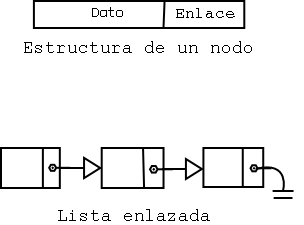

En Ciencias de la Computación, una lista enlazada es una de las estructuras de datos fundamentales, y puede ser usada para implementar otras estructuras de datos. 
Consiste en una secuencia de nodos, en los que se guardan campos de datos arbitrarios y una o dos referencias (punteros) al nodo anterior o posterior. El principal beneficio de las listas enlazadas respecto a los array convencionales es que el orden de los elementos enlazados puede ser diferente al orden de almacenamiento en la memoria o el disco, permitiendo que el orden de recorrido de la lista sea diferente al de almacenamiento.

In [ ]:
#include <stdio.h>
#include <stdlib.h>
 
typedef struct nodo{ //nodo es el nombre de la estructura
    int valor;
    struct nodo *sig; //El puntero siguiente para recorrer la lista enlazada
}Nodo; //Nodo es el tipo de dato para declarar la estructura
 


Realizar una función que imprima la lista enlazada

In [4]:
%%writefile listas_enl.c
#include <stdio.h>
#include <stdlib.h>
 
typedef struct nodo{ //nodo es el nombre de la estructura
    int valor;
    struct nodo *sgte; //El puntero siguiente para recorrer la lista enlazada
}Nodo; //Nodo es el tipo de dato para declarar la estructura
 
void imprime_lista(Nodo *n){
    printf("%d -> ", n->valor);
    if(n->sgte == NULL){
        printf("NULL\n");
    }
    else{
        imprime_lista(n->sgte);
    }
    
}

int main(){
    Nodo n1={10,NULL};
    Nodo n2={20,&n1};

    Nodo *lista= &n2;
    imprime_lista(lista);
    

    return 0;
    
}

Overwriting listas_enl.c


In [5]:
%%script bash

gcc listas_enl.c -o list

In [6]:
!./list

20 -> 10 -> NULL


Realizar una función que inserte un elemento en la lista

In [7]:
%%writefile listas_enl2.c
#include <stdio.h>
#include <stdlib.h>
 
typedef struct nodo{ //nodo es el nombre de la estructura
    int valor;
    struct nodo *sgte; //El puntero siguiente para recorrer la lista enlazada
}Nodo; //Nodo es el tipo de dato para declarar la estructura
 
void imprime_lista(Nodo *n){
    printf("%d -> ", n->valor);
    if(n->sgte == NULL){
        printf("NULL\n");
    }
    else{
        imprime_lista(n->sgte);
    }
    
}

void insertar(Nodo *lista, int valor){
  if(lista->sgte == NULL){
        //Nodo nuevo = {valor, NULL};
        Nodo *nuevo = malloc(sizeof(Nodo));
        nuevo->valor=valor;
        nuevo->sgte=NULL;
        lista->sgte =nuevo;
    }
    else{
        insertar(lista->sgte, valor);
    }
}

int main(){
    Nodo n1={10,NULL};
    Nodo n2={20,&n1};

    Nodo *lista= &n2;
    imprime_lista(lista);
    insertar(lista, 30);
    imprime_lista(lista);
    return 0;
    
}


Writing listas_enl2.c


In [8]:
%%script bash

gcc listas_enl2.c -o list2

In [9]:
!./list2

20 -> 10 -> NULL
20 -> 10 -> 30 -> NULL


Ejercicio propuesto:

escriba una función que elimine el último elemento de la lista, y una que elimine dado un valor.